<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>Data Science</center>
# <center>4 - Textual Data</center>
---

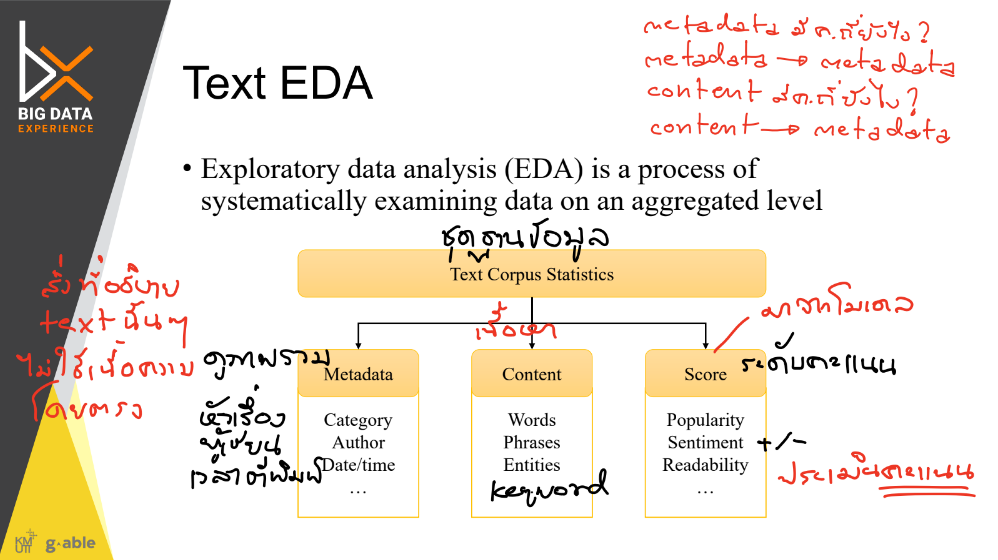

# 1. Loading dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('un-general-debates-blueprint.csv.gz')

In [3]:
df.sample(3)
# primary key is session+country or year+country

,session,year,country,country_name,speaker,position,text
7344,70,2015,CHE,Switzerland,Simonetta Sommaruga,President,On the ruins of a world ravaged by the Second ...
6112,63,2008,SDN,Sudan,Ali Osman Mohamed Taha,Vice-President,"It is indeed \nmy pleasure, on behalf of the l..."
971,33,1978,BGD,Bangladesh,Huq,NaN,﻿\n\n147.\tI bring this Assembly the warm gree...


# Metadata EDA

# 2. DataFrame summary statistics

In [4]:
#วัดความยาวของ text (character)
df['length'] = df['text'].str.len()
df.head()

,session,year,country,country_name,speaker,position,text,length
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911


In [5]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text', 'length'],
      dtype='object')

In [6]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
length           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
 7   length        7507 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 469.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [9]:
#include='O' -> ดู statistics เฉพาะ object
#ให้ค่าสถิติของตัวที่เป็น category
df[['country','speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


# 3. Checking for missing data

## Checking

In [10]:
df.isna().sum()
# speaker and position have missing data

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

## Fixing

In [11]:
# ต้อง replace เพื่อให้สามารถนำไปหาค่า วิเคราะห์ต่อได้
df['speaker'].fillna('unknown',inplace=True)

In [12]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker            0
position        3005
text               0
length             0
dtype: int64

## More problems

In [13]:
# text เขียนต่างกัน แต่หมายถึงคนเดียวกัน
# นามสกุลเดียวกัน
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

# 4. Plotting distributions

## Length distribution

<AxesSubplot:>

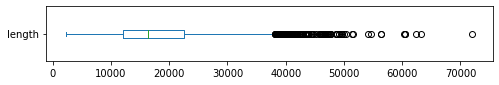

In [14]:
# ดูการกระจายตัวของความยาว text
df['length'].plot(kind='box', vert=False, figsize=(8, 1))
# มี outliers ค่อนข้างเยอะ 
# right skewed

<AxesSubplot:ylabel='Frequency'>

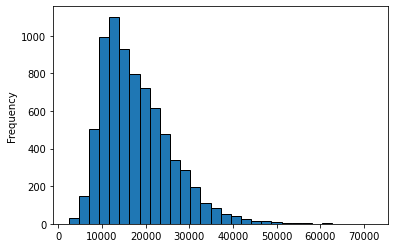

In [15]:
df['length'].plot(kind='hist', bins=30, figsize=(6, 4), edgecolor='k')
# การกระจายตัวความยาวของ speech 

# Metadata -> Metadata

# 5. Distributions across categories

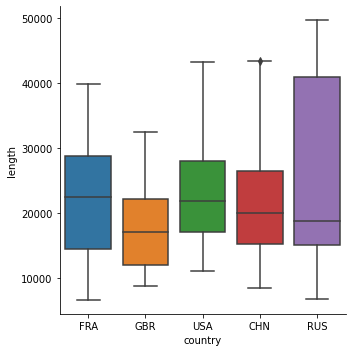

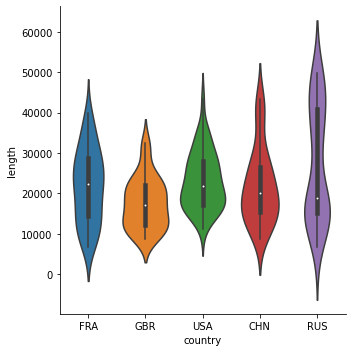

In [16]:
# เอาการกระจายตัวข้างต้นมาเปรียบเทียบกับ category อื่นๆ
# length of text vs country
import seaborn as sns

where = df['country'].isin(['USA','FRA','GBR','CHN','RUS'])
sns.catplot(data=df[where], x='country', y='length', kind='box')
sns.catplot(data=df[where], x='country', y='length', kind='violin') # density plot (like histogram)

# 6. Development over time

<AxesSubplot:title={'center':'Number of Countries'}, xlabel='year'>

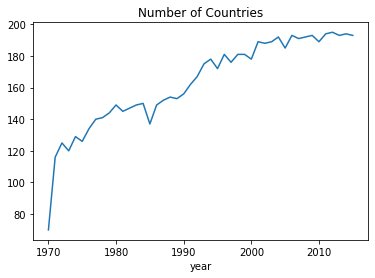

In [17]:
# ดูแนวโน้มการเปลี่ยนแปลงเทียบกับเวลา
df.groupby('year').size().plot(title='Number of Countries')

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

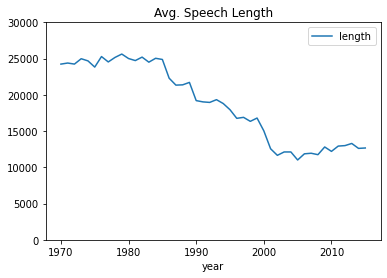

In [18]:
df.groupby('year').agg({'length':'mean'})\
  .plot(title='Avg. Speech Length', ylim=(0,30000))
# การพูดใช้คำน้อยลงตามเวลา

# 7. Simple Text Processing
1. Case folding
2. Tokenization
3. Stop word removal

## 7.1 Case Folding

In [19]:
str.lower('Hello World!')

'hello world!'

## 7.2 Tokenization

In [20]:
import regex as re #regular expression
#แบ่งด้วยช่องว่าง
def tokenize(text):
    # หารูปแบบที่เป็น ช่องว่าง(white space)+คำ(text)+ช่องว่าง(white space)
    return re.findall(r'[\w-]*\p{L}[\w-]*', text) # ดึงจาก text

In [21]:
# 2021 not an alphabet ไม่ใช่รูปแบบ r'[\w-]*\p{L}[\w-]*'
text = "Let's defeat SARS-Cov-2 together in 2021!"
tokens = tokenize(text) # output = list ของคำ
print("|".join(tokens)) # join ทุกคำโดยมี | คั่น

Let|s|defeat|SARS-Cov-2|together|in


## 7.3 Stopword Removal

In [22]:
import nltk
nltk.download('stopwords')
# stopwords = คำที่ไม่เป็น keyword มักพบบ่อยในข้อความ เช่น I 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# เอาคำที่เป็นคำเชื่อมออก e.g i an the
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [24]:
# ใช้วิธี bag of words(list) ตัดคำที่อยู่ใน stopwords ออก
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [25]:
remove_stop(tokens)

['Let', 'defeat', 'SARS-Cov-2', 'together']

## 7.4 Processing a pipeline

In [26]:
# ลำดับการประมวลผลชุดข้อมูล โดยการนำฟังก์ชั่นมาใส่ list แล้ว สร้างฟังก์ชั่นให้ทำงานตาม pipeline
pipeline = [str.lower, tokenize, remove_stop]
# วนตามลำดับใน pipeline
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [27]:
prepare(text, pipeline)

['let', 'defeat', 'sars-cov-2', 'together']

## 7.5 Applying pipeline

In [28]:
# apply จะสามารถกำหนดค่าให้ argument ใน function ได้ เช่นกำหนดค่า pipeline=pipeline 
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df.sample(3)

,session,year,country,country_name,speaker,position,text,length,tokens
83,26,1971,CAF,Central African Republic,Mr. POTOLOT,NaN,"191.\tBefore delivering my speech, 1 should li...",21025,"[delivering, speech, like, express, condolence..."
797,31,1976,SGP,Singapore,Mr. Rajaratnam,NaN,"Mr. President, your election as President of t...",24919,"[mr, president, election, president, thirty-fi..."
386,28,1973,MNG,Mongolia,Rinchin,NaN,"﻿ \n\n Mr. President, allow me, on behalf of t...",24112,"[mr, president, allow, behalf, delegation, mon..."


## 7.6 Counting number of tokens (words)

In [29]:
#นับคำหลังจากตัด stop words ทิ้งไปแล้ว
df['num_tokens'] = df['tokens'].map(len)

In [30]:
df.head()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419,"[may, first, convey, president, congratulation...",4092
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286,"[fortunate, coincidence, precisely, time, unit...",2341
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839,"[pleasure, extend, mr, president, warmest, con...",2575
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616,"[may, begin, expressing, ambassador, hambro, b...",2166
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911,"[doubt, us, coming, rostrum, wonders, usefulne...",2064


# Content EDA

# 8. Word Frequency Analysis

In [31]:
# นับความถี่ของคำที่เกิดขึ้น เกิดกี่ครั้ง
# ไม่สนใจบริบทและลำดับ
from collections import Counter
tokens = tokenize("She likes my cats and my cats like my sofa")

counter = Counter(tokens)
print(counter)
# ได้ output เป็น dictionary type

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [32]:
#update ค่าเพิ่มเข้าไปใน list เดิมได้
more_tokens = tokenize("She likes dogs and cats")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [33]:
%%time
import numpy as np
# ได้เป็น list ของข้อมูลทั้งหมด แล้วค่อยนับทีเดียว
tokens = df['tokens'].explode().values
counter = Counter(tokens)
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
Wall time: 3.26 s


In [34]:
%%time
# สร้าง object Counter() เปล่าๆมา แล้ว .map(counter.update) นับข้อมูลทีละแถวไปเรื่อยๆ
counter = Counter()
# รันแบบขนานใช้เวลาน้อยกว่า
df['tokens'].map(counter.update)

print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
Wall time: 2.35 s


# 9. Word Counting, DataFrame version

In [35]:
# input : dataframe output : dataframe
def count_words(df, column='tokens', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        # ไว้สำหรับกรณีต้องการ preprocess ก่อน
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    
    # @ ใช้สำหรับการเอาค่า argument แทนลงใน string
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [36]:
freq_df = count_words(df)
freq_df.head(6)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625


In [37]:
# count words with 10 or more characters
count_words(df, column='text',
           preprocess=lambda text: re.findall(r"\w{10,}", text))

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177
...,...
preexisting,3
correlations,3
empirically,3


# 10. Frequency plot

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

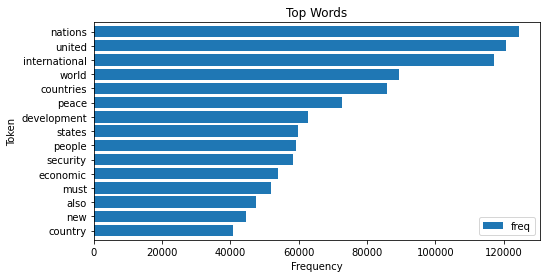

In [38]:
# ดูความถี่แบบ frequency plot ดูความถี่สูงสุด 10 คำแรก
ax = freq_df.head(15).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis() # เปลี่ยนให้เรียงจากมากไปน้อย
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# 11. Word Clouds

In [39]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]
text

'Seventy years after the founding of the United Nations it is worth reflecting on what the members of this body, working together, have helped to achieve. Out of the ashes of the Second World War, having witnessed the unthinkable power of the atomic age, the United States has worked with many nations in the Assembly to prevent a third world war — by forging alliances with old adversaries; by supporting the steady emergence of strong democracies accountable to their people and not to any foreign Power; and by building an international system that imposes a cost on those who choose conflict over cooperation, an order that recognizes the dignity and equal worth of all people.\nThat has been the work of seven decades. That is the ideal that this body has, at its best, pursued. Of course, there have been too many times when, collectively, we have fallen short of those ideals. Over the seven decades, terrible conflicts have claimed untold victims. But we have pressed forward, slowly, steadil

(-0.5, 399.5, 199.5, -0.5)

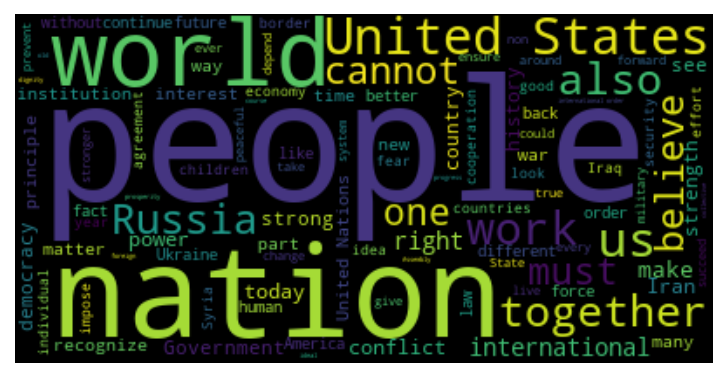

In [41]:
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

## Word Cloud framework

In [42]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

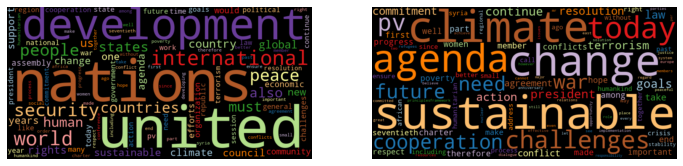

In [43]:
freq_2015_df = count_words(df[df['year']==2015])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)
#plt.tight_layout()###

In [44]:
freq_2015_df

,freq
token,
nations,2587
united,2571
development,1754
international,1727
world,1635
...,...
apostle,3
fragmented,3
deliberative,3


# 12. Finding a Keyword-in-Context

In [45]:
!pip install textacy

Defaulting to user installation because normal site-packages is not writeable


In [46]:
# visualize เฉพาะเจาะจงกับคำ ดูว่า text รอบๆคำที่สนใจมีคำว่าอะไรบ้าง
from textacy.extract.kwic import keyword_in_context
import random

def kwic(doc_series, keyword, window=35, print_samples=5):
    
    def add_kwic(text):
        kwic_list.extend(keyword_in_context(text, keyword, ignore_case=True, window_width=window))
    
    kwic_list = []
    doc_series.map(add_kwic)
    
    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        # เว้นวรรคระหว่างคำที่เราสนใจกับบริบทรอบข้าง
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0]) + '  ' + \
                  sample[1]+'  ' +\
                  re.sub(r'[\n\t]',' ', sample[2]))

In [47]:
kwic(df[df['year']==2015]['text'], 'sdgs', print_samples=5)

5 random samples out of 73 contexts for 'sdgs':
10 years that are in line with the   SDGs   just adopted. Of greater significa
le of the century. In adopting the   SDGs  , the Marshall Islands cannot affor
the Sustainable Development Goals (  SDGs  ) will depend on revitalized and en
new Sustainable Development Goals (  SDGs  ) aspire to that same vision. The A
the Sustainable Development Goals (  SDGs  ). In other words, it is addressing


# 13. N-gram

In [48]:
# ดูคำแบบเป็น combinations ของคำ
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [49]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens,2)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


# 14. N-gram with stopword

In [50]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [51]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
tokens

['the', 'visible', 'manifestation', 'of', 'the', 'global', 'climate', 'change']

In [52]:
#print("|".join(ngrams(tokens,2, stopwords=stopwords)))
print(ngrams(tokens,2, stopwords=stopwords))

['visible manifestation', 'global climate', 'climate change']


# Content -> Metadata 

# 15. Comparing frequencies across time intervals and categories

In [53]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [54]:
keywords = ['nuclear','terrorism','climate','freedom']
tokens = ['nuclear','climate','climate','freedom','climate','freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


In [55]:
def count_keywords_by(df, by, keywords, column='tokens'):
    # freq_matrix = series ของ list จำนวนความถี่ของ keyword นั้นๆ ในแต่ละแถว
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    # convert series ของ list ไปเป็น dataframe แปลง record แต่ละอันเป็น column ชื่อ keyword
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

In [56]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

In [57]:
freq_df

,nuclear,terrorism,climate,freedom
year,,,,
1970,192,7,18,128
1971,275,9,35,205
1972,393,379,74,280
1973,347,124,79,266
1974,478,24,71,316
1975,578,20,53,232
1976,451,146,57,347
1977,675,75,58,321
1978,550,82,52,309


<AxesSubplot:xlabel='year'>

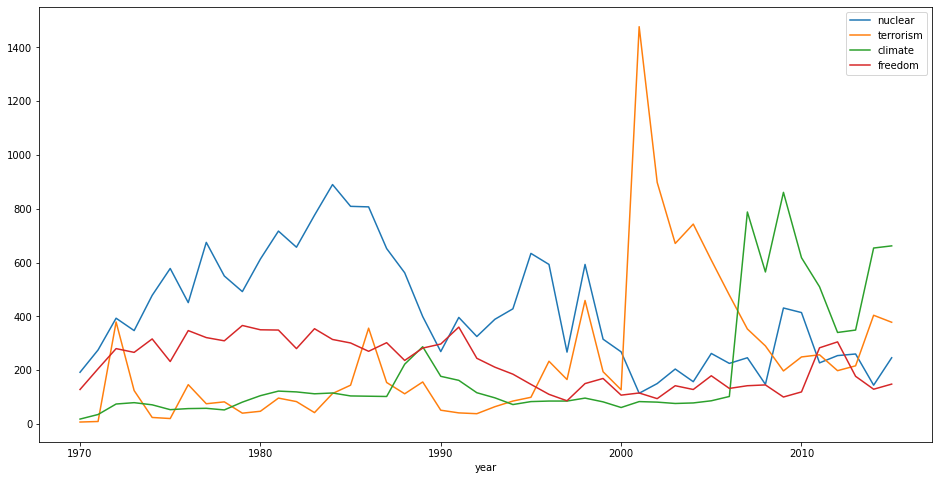

In [58]:
# plot trend
freq_df.plot(kind='line', figsize=(16,8))

## Textual Data Lab

### preparing data

In [59]:
def ngrams(tokens, n=2, sep=' ', stopwords=stopwords):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [60]:
pipeline1 = [str.lower, tokenize, remove_stop]
pipeline2 = [str.lower, tokenize, ngrams]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [61]:
df['unigram_tokens'] = df['text'].apply(prepare, pipeline=pipeline1)
df['bigram_tokens'] = df['text'].apply(prepare, pipeline=pipeline2)
df.sample(4)

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,unigram_tokens,bigram_tokens
2825,45,1990,MMR,Myanmar,GYAW,NaN,"﻿Sir, allow me to begin by offering you the wa...",21971,"[sir, allow, begin, offering, warmest, felicit...",1861,"[sir, allow, begin, offering, warmest, felicit...","[sir allow, warmest felicitations, general ass..."
7351,70,2015,COM,Comoros,Mr. Ikililou Dhoinine,President,As I take the floor for the last time before t...,11059,"[take, floor, last, time, general, assembly, f...",940,"[take, floor, last, time, general, assembly, f...","[last time, general assembly, five years, gene..."
6000,63,2008,COG,Congo,Basile Ikouebe,Minister for Foreign Affairs,My \ndelegation welcomes your inspired electio...,13460,"[delegation, welcomes, inspired, election, sir...",1087,"[delegation, welcomes, inspired, election, sir...","[delegation welcomes, inspired election, elect..."
4394,54,1999,MRT,Mauritania,Ahmed Ould Sid Ahmed,Minister for Foreign Affairs,"At the outset, I wish, on behalf of the Islami...",12473,"[outset, wish, behalf, islamic, republic, maur...",1001,"[outset, wish, behalf, islamic, republic, maur...","[islamic republic, excellency mr, mr theo-ben,..."


### 1. Find the top 10 word bigram from UN General Debates of years 1970 –1990 and compare with those of years 1990 –the latest (remove stopwordsfirst)

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Bigram Token'),
 Text(0.5, 1.0, 'Top 10 Words Bigram 1970 –1990')]

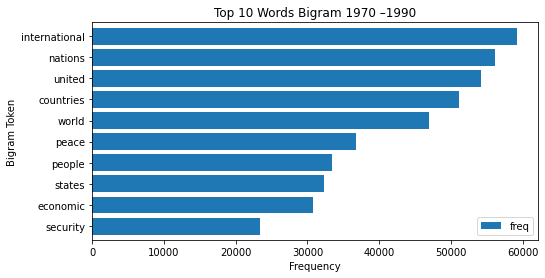

In [62]:
text1 = df.query("year>=1970 and year<=1990")
freq_df1 = count_words(text1)

ax = freq_df1.sort_values('freq', ascending=False).head(10).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis() # เปลี่ยนให้เรียงจากมากไปน้อย
ax.set(xlabel='Frequency', ylabel='Bigram Token', title='Top 10 Words Bigram 1970 –1990')

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Bigram Token'),
 Text(0.5, 1.0, 'Top 10 Words Bigram 1990 –2015')]

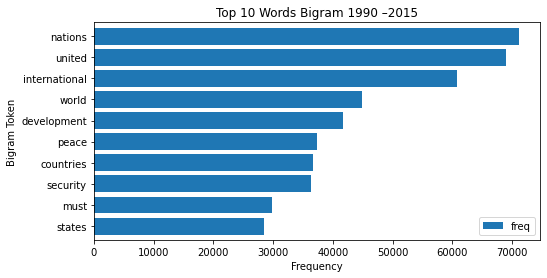

In [63]:
text2 = df.query("year>=1990 and year<=2015")
freq_df2 = count_words(text2)

ax = freq_df2.sort_values('freq', ascending=False).head(10).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis() # เปลี่ยนให้เรียงจากมากไปน้อย
ax.set(xlabel='Frequency', ylabel='Bigram Token', title='Top 10 Words Bigram 1990 –2015')

### 2. Create a bigram word cloud of the UN General Debates dataset of years 1970 –1990 and 1990 to the latest (remove stopwordsfirst)

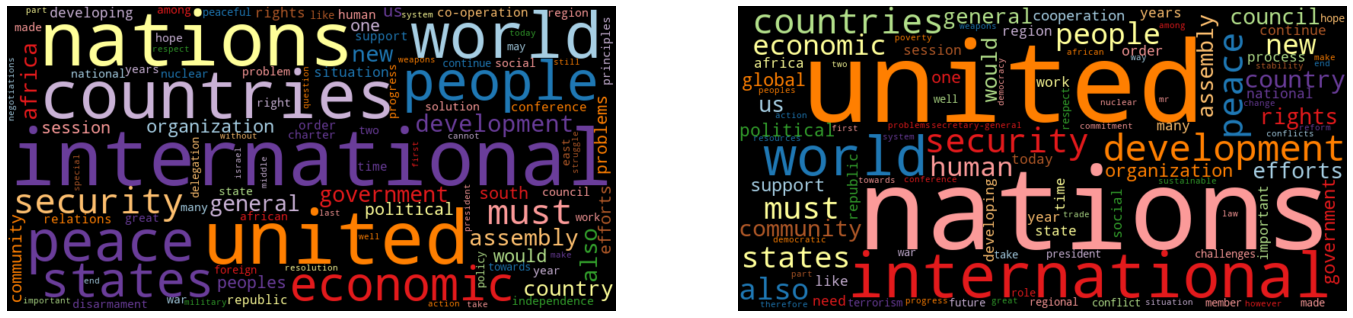

In [64]:
plt.figure(figsize=(24,8))
plt.subplot(1,2,1)###
wordcloud(freq_df1['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_df2['freq'], max_words=100)
#plt.tight_layout()###

### 3. Create a trend graph showing the bigram and word trend of “climate change”, “global warming”, “wars” and 3 others of your choices

In [65]:
unigram_keywords = ['japan', 'wars']
bigram_keywords = ['narcotic drugs','soviet union','climate change', 'global warming']

freq_df3 = count_keywords_by(df, by='year', keywords=unigram_keywords, column='unigram_tokens')
freq_df4 = count_keywords_by(df, by='year', keywords=bigram_keywords, column='bigram_tokens')

<AxesSubplot:xlabel='year'>

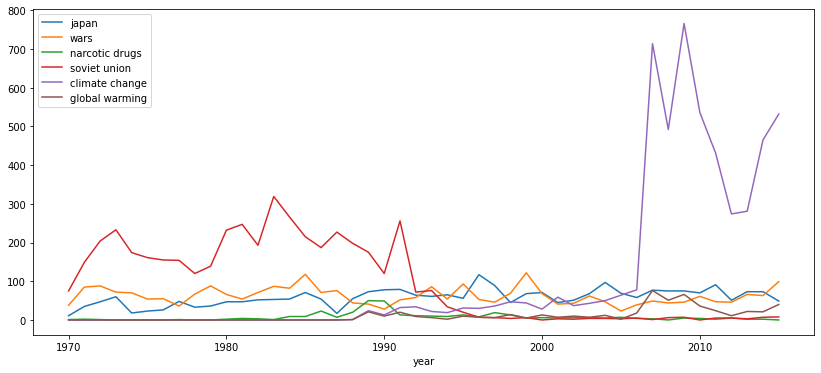

In [66]:
ax = freq_df3.plot(kind='line', figsize=(14,6))
freq_df4.plot(ax=ax)

---